In [71]:
#Import Stuff

from ift6758.data.nhl_data_parser import NHLDataParser
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#Download data for seasons
parser = NHLDataParser()
parser.get_shot_and_goal_pbp_df_for_seasons(2018,2020)
parser.get_shot_and_goal_pbp_df_for_season(2023)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [61]:
df_2023 = parser.get_shot_and_goal_pbp_df_for_season(2023)
df_2018_2020 = parser.get_shot_and_goal_pbp_df_for_seasons(2018,2020)

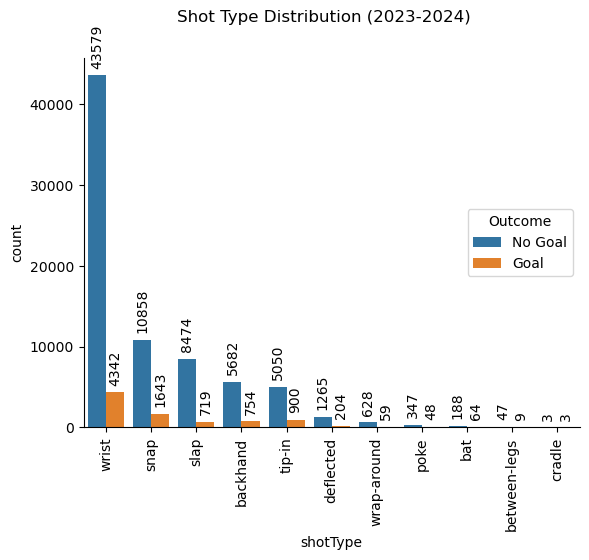

In [60]:
shot_counts = sns.countplot(x='shotType',data=df_2023,hue='eventType',order=df['shotType'].value_counts().index)
plt.legend(title='Outcome', loc='center right', labels=['No Goal', 'Goal'])
plt.xticks(rotation=90)
plt.suptitle("Shot Type Distribution (2023-2024)")
for container in shot_counts.containers:
    shot_counts.bar_label(container,rotation=90,padding=5)
shot_counts.spines[['right', 'top']].set_visible(False)